In [2]:
!pip install countryinfo
!pip install missingno
import pandas as pd
import numpy as np
import missingno as msno
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 16)

In [204]:
conda install opencv 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


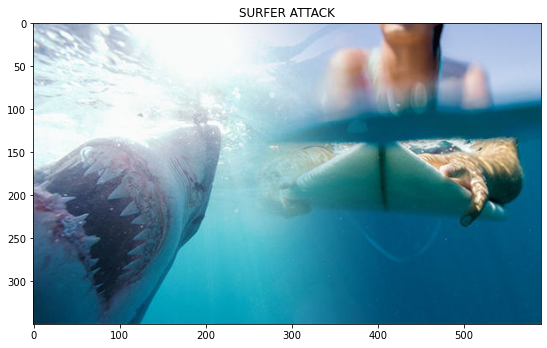

In [205]:
import cv2
binary = cv2.imread('Image1 surfer.jpg')
binary.shape
plt.figure(figsize=[20,20])
plt.imshow(binary[:,:,::-1])
plt.title("Surfer")
plt.subplot(122)
plt.imshow(binary[:,:,::-1])
plt.title("SURFER ATTACK")
plt.show()

In [70]:
db = pd.read_csv('attacks.csv', encoding='cp1252')
len(db)

25723

## 1. First visualitation

In [71]:
db.head(1)

Case Number         Date    Year     Type Country        Area  \
0  2018.06.25  25-Jun-2018  2018.0  Boating     USA  California   

                      Location  Activity         Name Sex  Age  \
0  Oceanside, San Diego County  Paddling  Julie Wolfe    F  57   

                                              Injury Fatal (Y/N)   Time  \
0  No injury to occupant, outrigger canoe and pad...           N  18h00   

      Species  Investigator or Source                   pdf  \
0  White shark       R. Collier, GSAF  2018.06.25-Wolfe.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   

  Case Number.2  original order Unnamed: 22 Unnamed: 23  
0    2018.06.25          6303.0         NaN         NaN

## 2. Drop duplicates rows

In [72]:
#db.drop_duplicates()

## 3. Checking null data, how many empty cells there are in every column.

In [73]:
null_cols = db.isnull().sum()
null_cols

Case Number       17021
Date              19421
Year              19423
Type              19425
Country           19471
                  ...  
Case Number.1     19421
Case Number.2     19421
original order    19414
Unnamed: 22       25722
Unnamed: 23       25721
Length: 24, dtype: int64

## 4. No duplicates, len remains the same (25,723)

In [74]:
len(db)

25723

## 5. Show columns of db that have NaN values

In [75]:
def null_cols(db):
    nulls = db.isna().sum()
    return nulls[nulls > 0] / len(db) * 100
null_cols(db)

Case Number       66.170353
Date              75.500525
Year              75.508300
Type              75.516075
Country           75.694903
                    ...    
Case Number.1     75.500525
Case Number.2     75.500525
original order    75.473312
Unnamed: 22       99.996112
Unnamed: 23       99.992225
Length: 24, dtype: float64

## 6. Deleting blank spaces

In [76]:
db.columns = db.columns.str.rstrip()
db['Sex']= db['Sex'].str.strip()
db['Country']= db['Country'].str.strip()
db['Age']= db['Age'].str.strip()
db['Case Number']= db['Case Number'].str.strip()

## 7. Check if 'Case Number' contains the same info as "Case Number.1" & "Case Number.1"

In [77]:
(db[(db["Case Number"] == db["Case Number.1"]) & (db["Case Number"] == db["Case Number.2"])].shape)

(6275, 24)

In [78]:
db.drop(columns = ["Case Number.1", "Case Number.2"], inplace = True)

## 8. Unnamed: 22" and "Unnamed: 23" are mostly empty. Let's examine what they contain

In [79]:
db['Unnamed: 22'].fillna(0, inplace=True)
[x for x in db['Unnamed: 22'] if x!=0]

['stopped here']

In [80]:
db['Unnamed: 23'].fillna(0, inplace=True)
[y for y in db['Unnamed: 23'] if y!=0]

['Teramo', 'change filename']

### We will drop Unmamed:22, only contain 'stopped here'/ Unmamed:23, only contain 'Teramo' & 'change filename'

In [81]:
db.drop(columns = ["Unnamed: 22", "Unnamed: 23"], inplace = True)

## 9. Let's check how many different values contain this two columns in order to drop one of them

In [82]:
db[db["href formula"] != db["href"]][["href formula", "href"]].shape

(19481, 2)

### Searching missing values in 'href formula' which is present in 'href':

In [83]:
db[(db["href formula"] != db["href"]) & (db["href formula"]).isna()]["href"]

3244     http://sharkattackfile.net/spreadsheets/pdf_di...
6302                                                   NaN
6303                                                   NaN
6304                                                   NaN
6305                                                   NaN
                               ...                        
25718                                                  NaN
25719                                                  NaN
25720                                                  NaN
25721                                                  NaN
25722                                                  NaN
Name: href, Length: 19422, dtype: object

### Then assign this value to the dataset:

In [84]:
db.at[3244, 'href formula'] = db.loc[3244]["href"]

### checking everything it's correct now

In [85]:
db[(db["href formula"] != db["href"]) & (db["href formula"]).isna()]["href"]

6302     NaN
6303     NaN
6304     NaN
6305     NaN
6306     NaN
        ... 
25718    NaN
25719    NaN
25720    NaN
25721    NaN
25722    NaN
Name: href, Length: 19421, dtype: object

### Dropping href

In [86]:
db.drop(columns = ["href"], inplace = True)

## 10. ‘all’ : If all values are NaN, drop that row or column.

In [87]:
db = db.dropna(how='all')
len(db)
#db = db.dropna() dropea todo si algún valor es NaN

8703

## 11. Reindexing dataframe

In [88]:
db.reset_index(drop=True)
db.head(1)

Case Number         Date    Year     Type Country        Area  \
0  2018.06.25  25-Jun-2018  2018.0  Boating     USA  California   

                      Location  Activity         Name Sex Age  \
0  Oceanside, San Diego County  Paddling  Julie Wolfe   F  57   

                                              Injury Fatal (Y/N)   Time  \
0  No injury to occupant, outrigger canoe and pad...           N  18h00   

       Species Investigator or Source                   pdf  \
0  White shark       R. Collier, GSAF  2018.06.25-Wolfe.pdf   

                                        href formula  original order  
0  http://sharkattackfile.net/spreadsheets/pdf_di...          6303.0

## 12. Let's have a look to Age and Sex columns

In [89]:
print(db['Age'].dtypes)

object


### Checking NaN rows

In [90]:
NaN_rows_Age=db["Age"].isna().sum()
print('NaN rows Age:')
print(NaN_rows_Age)
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)

NaN rows Age:
5232
5232


In [91]:
#print(pd.to_numeric(db['Age'], errors='coerce').isnull().value_counts())

TypeError: 'value' must be an instance of str or bytes, not a float

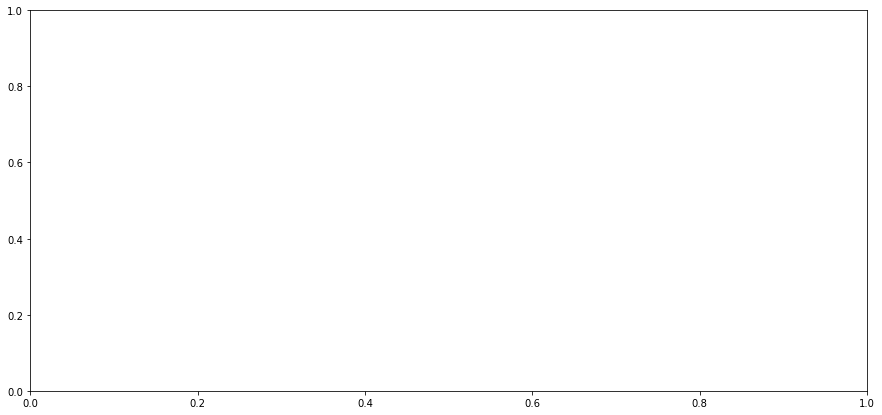

In [92]:
plt.figure(figsize=[15,7])
plt.hist(db['Age'])
#plt.xticks(fontsize=8) 
#plt.yticks(fontsize=8)
#plt.xlabel('Age',fontsize=15)
#plt.ylabel('Sum',fontsize=15)
#plt.grid(axis='y', alpha=0.75)

In [ ]:
db['Age'] = db['Age'].str.replace('X', '')
db['Age'] = db['Age'].str.replace('\xa0', '')
db['Age'] = db['Age'].str.replace('MAKE LINE GREEN', '')
db['Age'] = db['Age'].str.replace('F', '')
db['Age'] = db['Age'].str.replace('A.M.', '')

In [93]:
print(set(db['Age']))

{nan, '', '35', '60s', '71', '46 & 34', '81', '69', 'F', 'teen', '34', '45', '24', '1', '36 & 26', '17 & 16', 'A.M.', '6½', '86', '84', '29', '31', '"middle-age"', '8 or 10', '7', '10', '36 & 23', '33 & 37', '77', '31 or 33', '39', '13', '21 or 26', '53', '28 & 26', '56', '23', '33 & 26', '34 & 19', 'MAKE LINE GREEN', '52', '13 or 14', '18 to 22', '10 or 12', 'X', '7      &    31', 'Teens', '25 or 28', '13 or 18', 'Elderly', '54', '40', '21', '58', '64', '>50', '43', '30 & 32', '17 & 35', '8', '33 or 37', 'Ca. 33', '9', '28, 23 & 30', '15', '50', '36', '23 & 26', '11', '7 or 8', '2 to 3 months', '9 or 10', 'mid-30s', '22', '66', '75', '28', '42', '16 to 18', 'Both 11', '37', '20?', '59', '25 to 35', 'Teen', '65', '60', '12 or 13', '63', '62', '32', '25', '23 & 20', '"young"', '2½', '37, 67, 35, 27,  ? & 27', '57', '40s', '30', '50s', "60's", '26', '73', '48', '82', '5', '18', '67', '17', '30s', 'mid-20s', '9 months', '70', '?    &   14', '72', '19', '(adult)', '87', '27', '18 months', 

In [300]:
#Country mode = USA. we can use this average Age to fillin empty rows in Age
Country_age_mean=db.groupby(by='Country').mean()['Age']


KeyError: 'Age'

In [301]:
#db['Age'] = db['Age'].fillna('26.755798')
#db['Age'] = db['Age'].str.replace('NaN', '3 - 25-34 years old') #26.755798
#db['Age'] = db['Age'].str.replace('0', '3 - 25-34 years old') #26.755798

Replace first wrong values/Age demographic rages:
Under 12 years old
12-17 years old
18-24 years old
25-34 years old
35-44 years old
45-54 years old
55-64 years old
65-74 years old
75 years or older

In [302]:
db['Age']=db['Age'].replace(['9 months', '9 or 10','8 or 10','Both 11','10 or 12',  '9 & 12', '18 months', '7 or 8',  '2½', '2 to 3 months','6½',], '0 - Under 12 years old')
db['Age']=db['Age'].replace(['12 or 13','teen','"young"','young',  '?    &   14', '12-17 years old','13 or 14', '13 or 18', '16 to 18', '17 & 16', 'Teen', 'Teens'], '1 - 12-17 years old' )
db['Age']=db['Age'].replace(['mid-20s','23 & 26', '17 & 35', '18 or 20', '18 to 22', '20?', '20s', '21 & ?'], '2 - 18-24 years old')
db['Age']=db['Age'].replace(['23 & 20','21 or 26','30 or 36','mid-30s','28 & 26', '30s', '30 & 32', '31 or 33', '32 & 30', '(adult)', 'adult','25 or 28', '25 to 35', '28 &26', '28, 23 & 30', ], '3 - 25-34 years old')
db['Age']=db['Age'].replace(['Ca. 33', '33 & 37', '33 or 37', '33 & 26', '40s'], '4 - 35-44 years old')
db['Age']=db['Age'].replace(['>50','"middle-age"','50s'], '5 - 45-54 years old')
db['Age']=db['Age'].replace(['60s', "60's"], '6 - 55-64 years old')
db['Age']=db['Age'].replace(['Elderly'], '8 - 75 years or older')
db['Age']=db['Age'].replace(['21, 34,24 & 35','36 & 23','36 & 26','? & 19', '7      &    31','34 & 19','37, 67, 35, 27,  ? & 27', '46 & 34','50 & 30'], 'Different ages')

In [303]:
db['Age']=db['Age'].replace(['1','2','3','4','5','6','7','8','9','10','11'], '0 - Under 12 years old')
db['Age']=db['Age'].replace(['12','13','14','15','16','17'], '1 - 12-17 years old')
db['Age']=db['Age'].replace(['18','19','20','21','22','23','24'], '2 - 18-24 years old')
db['Age']=db['Age'].replace(['25','26','27','28','29','30','31','32','33','34'], '3 - 25-34 years old')
db['Age']=db['Age'].replace(['35','36','37','38','39','40','41','42','43','44'], '4 - 35-44 years old')
db['Age']=db['Age'].replace(['45','46','47','48','49','50','51','52','53','54'], '5 - 45-54 years old')
db['Age']=db['Age'].replace(['55','56','57','58','59','60','61','62','63','64'], '6 - 55-64 years old')
db['Age']=db['Age'].replace(['65','66','67','68','69','70','71','72','73','74'], '7 - 65-74 years old')
db['Age']=db['Age'].replace(['75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94'], '8 - 75 years or older')

In [304]:
#db['Age'] = db['Age'].fillna('U')

In [305]:
#Print set of different values
set(db['Age'])

{'',
 '0 - Under 12 years old',
 '1 - 12-17 years old',
 '13 - 25-34 years old',
 '13 - 25-34 years old or 12',
 '18 or 23 - 25-34 years old',
 '2 - 18-24 years old',
 '23 & 23 - 25-34 years old',
 '23 - 25-34 years old',
 '23 - 25-34 years old?',
 '23 - 25-34 years olds',
 '28, 23 & 33 - 25-34 years old',
 '3 - 25-34 years old',
 '32 & 33 - 25-34 years old',
 '33 - 25-34 years old',
 '33 - 25-34 years old & 32',
 '33 - 25-34 years old or 36',
 '33 - 25-34 years olds',
 '4 - 35-44 years old',
 '43 - 25-34 years old',
 '43 - 25-34 years olds',
 '5 - 45-54 years old',
 '53 - 25-34 years old',
 '53 - 25-34 years old & 33 - 25-34 years old',
 '53 - 25-34 years olds',
 '6 - 55-64 years old',
 '63 - 25-34 years old',
 "63 - 25-34 years old's",
 '63 - 25-34 years olds',
 '7 - 65-74 years old',
 '73 - 25-34 years old',
 '8 - 75 years or older',
 '8 or 13 - 25-34 years old',
 '9 or 13 - 25-34 years old',
 '>53 - 25-34 years old',
 'Different ages',
 'mid-23 - 25-34 years olds',
 'mid-33 - 25-34

In [273]:
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)

5232


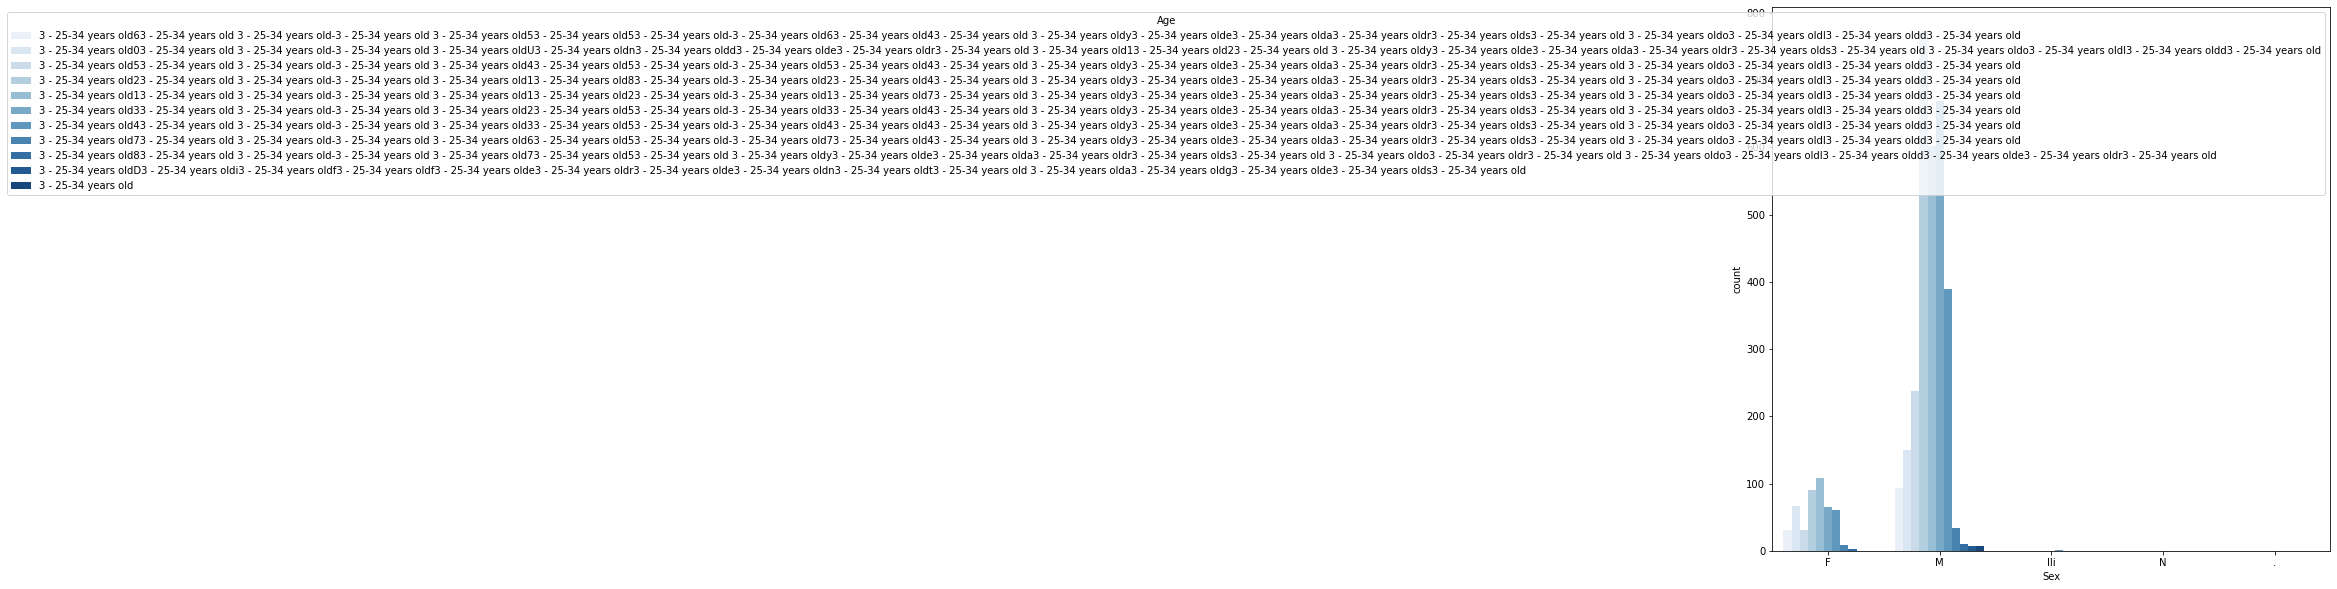

In [274]:
plt.figure(figsize=[10,10])
sns.countplot(x=db.Sex,
              hue=db.Age,
              palette="Blues")


In [ ]:
db.describe(include = 'O').transpose()

## Sex column

In [42]:
null_rows_Sex = db['Sex'].isnull().sum()
print(null_rows_Sex)

2966


In [43]:
#Print set of different values
set(db['Sex'])

{'.', 'F', 'M', 'N', 'lli', nan}

In [44]:
db['Sex']= db['Sex'].str.strip()

In [45]:
set(db['Sex'])

{'.', 'F', 'M', 'N', 'lli', nan}

In [46]:
db['Sex']=db['Sex'].replace(['.', 'lli', 'N'], 'U')
#db['Sex'] = db['Sex'].fillna('U')

In [47]:
set(db['Sex'])

{'F', 'M', 'U', nan}

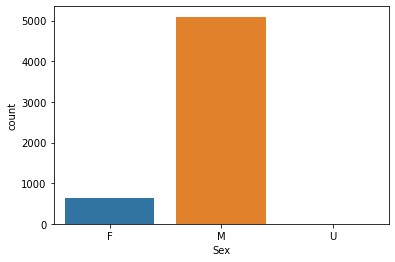

In [48]:
sns.countplot(x=db.Sex)

In [49]:
db[(db["Sex"] != db["Name"]) & (db["Sex"]).isna()]["Name"]

32               NaN
59       31 migrants
86               NaN
124              NaN
154              NaN
            ...     
8698             NaN
8699             NaN
8700             NaN
8701             NaN
25722            NaN
Name: Name, Length: 2966, dtype: object

In [52]:
set(db['Sex'])

{'F', 'M', 'U', nan}

In [95]:
db['Fatal (Y/N)']= db['Fatal (Y/N)'].str.strip()
set(db['Fatal (Y/N)'])

{'2017', 'M', 'N', 'UNKNOWN', 'Y', nan, 'y'}

In [96]:
db['Fatal (Y/N)'] = db['Fatal (Y/N)'].str.replace('y', 'Y')
db['Fatal (Y/N)']=db['Fatal (Y/N)'].replace(['2017','UNKNOWN','M'], 'U')
#db['Fatal (Y/N)'] = db['Fatal (Y/N)'].fillna('U')

In [97]:
# This is a list with the indexes of the rows which have NaN values in the column "Fatal"
rows_missing_FATAL = list(db[(db["Injury"].isna()== False) & (db["Fatal (Y/N)"].isna())].index)
len(rows_missing_FATAL)

532

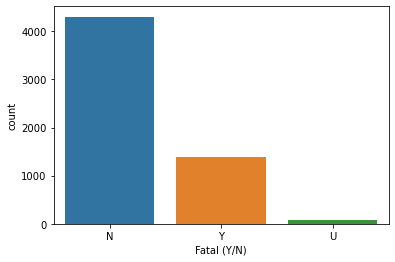

In [98]:
sns.countplot(x=db['Fatal (Y/N)'])

We should clarify more about the unknown

In [99]:
set(db['Type'])

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

In [100]:
db['Type'] = db['Type'].fillna('Not confirmed')
db['Type'] = db['Type'].str.replace('Boating', 'Boat')
db['Type'] = db['Type'].str.replace('Boatomg', 'Boat')
db['Type'] = db['Type'].str.replace('Invalid', 'Not confirmed')
db['Type'] = db['Type'].str.replace('Questionable', 'Not confirmed')

In [101]:
set(db['Type'])

{'Boat', 'Not confirmed', 'Provoked', 'Sea Disaster', 'Unprovoked'}

## . Country

In [102]:
print(db['Country'].dtypes)

object


In [103]:
db['Country']= db['Country'].str.strip()

In [139]:
set(db['Country'])

{'',
 ' ',
 'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'Cuba',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'France'

In [138]:
db['Country']=db['Country'].replace(['Fiji'], 'FIJI')
db['Country']=db['Country'].replace(['RED SEA?','READ SEA / INDIAN OCEAN'], 'READ SEA')
db['Country']=db['Country'].replace(['ST. MAARTIN'], 'ST. MARTIN')
db['Country']=db['Country'].replace(['SUDAN?'], 'SUDAN')
db['Country']=db['Country'].replace(['UNITED ARAB EMIRATES (UAE)'], 'UNITED ARAB EMIRATES')
db['Country']=db['Country'].replace(['WESTERN SAMOA'], 'SAMOA')
db['Country']=db['Country'].replace(['TOBAGO'], 'TRINIDAD & TOBAGO')
db['Country']=db['Country'].replace(['SOLOMON ISLANDS / VANUATU'], 'SOLOMON ISLANDS')
db['Country']=db['Country'].replace(['ST HELENA, British overseas territory'], 'ST HELENA')
db['Country']=db['Country'].replace(['MALDIVE ISLANDS'], 'MALDIVAS')
db['Country']=db['Country'].replace(['READ SEA','RED SEA / INDIAN OCEAN'], 'RED SEA')

In [131]:
Countries_max=db.Country.value_counts()
Countries_max.head(15)

USA                 2233
AUSTRALIA           1339
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                90
ITALY                 71
FIJI                  65
PHILIPPINES           62
REUNION               61
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
Name: Country, dtype: int64

In [107]:
#db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

Country                          Area                     Location
3387     NaN                 Caribbean Sea    Between St. Kitts & Nevis
4266     NaN  Between Comores & Madagascar                  Geyser Bank
4498     NaN                 Caribbean Sea  Between  Cuba  & Costa Rica
5020     NaN   French Southern Territories               Île Saint-Paul
6137     NaN                     St Helena                Landing Place

In [111]:
#rows_missing_Countries = list(db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)].index)
#rows_missing_Countries

[3387, 4266, 4498, 5020, 6137]

In [112]:
input_Countries= ["Saint Kitts and Nevis", "Mozambique", "Cuba", "France", "ST HELENA"]

In [113]:
def filling(data, indexes, values, col_name):
    j=0
    for i in indexes:   
        db.at[ i, col_name] = values[j]
        j = j+1

In [114]:
filling(db, rows_missing_Countries, input_Countries, "Country")

In [115]:
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

Empty DataFrame
Columns: [Country, Area, Location]
Index: []

In [119]:
db[(db.Country.isna()) & (db.Area.isna()) & (db.Location.isna()==False)][["Country", "Area", "Location"]]


Country Area                                   Location
3605     NaN  NaN                             Florida Strait
4639     NaN  NaN                225 miles east of Hong Kong
5425     NaN  NaN                           Near the equator
5810     NaN  NaN                                 Santa Cruz
6155     NaN  NaN                               Carlisle Bay
6206     NaN  NaN  In a river feeding into the Bay of Bengal

In [120]:
rows_missing_Countries2 = list(db[(db.Country.isna()) & (db.Area.isna()) & (db.Location.isna()==False)].index)
rows_missing_Countries2

[3605, 4639, 5425, 5810, 6155, 6206]

In [122]:
input_Countries2= ["USA", "CHINA", " ", "USA", "ANTIGUA", "INDIA"]
filling(db, rows_missing_Countries2, input_Countries2, "Country")
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

Empty DataFrame
Columns: [Country, Area, Location]
Index: []

In [125]:
db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())][["Country", "Area", "Location"]]


Country                                           Area Location
2956     NaN                                English Channel      NaN
4018     NaN              Between Timor & Darwin, Australia      NaN
4231     NaN             Near the Andaman & Nicobar Islands      NaN
4700     NaN                       Off South American coast      NaN
4712     NaN  300 miles east of St. Thomas (Virgin Islands)      NaN
5612     NaN                              Mediterranean Sea      NaN
5742     NaN                             Gulf of California      NaN
5808     NaN                                  Western Banks      NaN
6175     NaN                                     Ionian Sea      NaN
6177     NaN                                     Ionian Sea      NaN

In [127]:
rows_missing_Countries3 = list(db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())].index)
rows_missing_Countries3

[2956, 4018, 4231, 4700, 4712, 5612, 5742, 5808, 6175, 6177]

In [128]:
input_Countries3= ["", "AUSTRALIA", "INDIA","USA","VIRGIN ISLANDS","SPAIN", "USA","","SICILIA","SICILIA"]
filling(db, rows_missing_Countries3, input_Countries3, "Country")
db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())][["Country", "Area", "Location"]]

Empty DataFrame
Columns: [Country, Area, Location]
Index: []

In [130]:
null_cols(db['Country'])

array([27.92140641])

## FATAL related to Injury

In [31]:
db['Injury'].str.contains ('FATAL|fatal', regex=True).value_counts()

False    4927
True     1347
Name: Injury, dtype: int64

## Species fillin with White in Injury

In [26]:
db['Injury'].str.contains ('white|WHITE', regex=True).value_counts()

False    6259
True       15
Name: Injury, dtype: int64

In [43]:
rows_missing_SPECIES = list(db[(db["Injury"].isna()== False) & (db["Species"].isna())].index)
len(rows_missing_FATAL)

532

In [35]:
db2=db[(db["Injury"].isna()== False) & (db["Species"].isna())][["Injury", "Species"]]
print(db2)

                                                 Injury Species
1                            Minor injury to left thigh     NaN
2          Injury to left lower leg from surfboard skeg     NaN
5                               No injury, board bitten     NaN
9                                  Minor injury to foot     NaN
11                 Injuries to lower right leg and foot     NaN
...                                                 ...     ...
6297                                              FATAL     NaN
6298                                              FATAL     NaN
6299                                              FATAL     NaN
6300                                              FATAL     NaN
6301  FATAL. "Shark bit him in half, carrying away t...     NaN

[2821 rows x 2 columns]


### Only 15 rows in Injury contain White but threre are  empty rows in Species

In [166]:
db.describe(include = 'O').transpose()


count unique  \
Case Number             8702   6287   
Date                    6302   5433   
Type                    8703      5   
Country                 6252    204   
Area                    5847    825   
...                      ...    ...   
Time                    2948    366   
Species                 3464   1549   
Investigator or Source  6285   4969   
pdf                     6302   6291   
href formula            6302   6291   

                                                                      top  \
Case Number                                                             0   
Date                                                                 1957   
Type                                                           Unprovoked   
Country                                                               USA   
Area                                                              Florida   
...                                                                   ...   
Time                                                            Afternoon   
Species                                                       White shark   
Investigator or Source                                     C. Moore, GSAF   
pdf                                             1907.10.16.R-HongKong.pdf   
href formula            http://sharkattackfile.net/spreadsheets/pdf_di...   

                        freq  
Case Number             2400  
Date                      11  
Type                    4595  
Country                 2229  
Area                    1037  
...                      ...  
Time                     187  
Species                  163  
Investigator or Source   105  
pdf                        2  
href formula               2  

[17 rows x 4 columns]

In [106]:
db['Date2'] = db.Date.str.extract(r'\b(\w+)$', expand=True)



In [105]:
#We create a new datebase only with the columns are necessary. 
df = db[['Year','Type','Species', 'Country','Activity', 'Fatal (Y/N)','Sex', 'Age','original order']]
df.head(3000)

Year        Type                Species       Country  \
0     2018.0     Boating            White shark           USA   
1     2018.0  Unprovoked                    NaN           USA   
2     2018.0     Invalid                    NaN           USA   
3     2018.0  Unprovoked              2 m shark     AUSTRALIA   
4     2018.0    Provoked        Tiger shark, 3m        MEXICO   
...      ...         ...                    ...           ...   
2995  1982.0  Unprovoked      Raggedtooth shark  SOUTH AFRICA   
2996  1982.0        Boat  6 m [20'] white shark         ITALY   
2997  1982.0        Boat            White shark         ITALY   
2998  1982.0  Unprovoked                    NaN       TUNISIA   
2999  1981.0  Unprovoked  7 m [23'] white shark           USA   

               Activity Fatal (Y/N)  Sex                     Age  \
0              Paddling           N    F     6 - 55-64 years old   
1              Standing           N    F  0 - Under 12 years old   
2               Surfing           N    M     5 - 45-54 years old   
3               Surfing           N    M                     NaN   
4           Free diving           N    M                     NaN   
...                 ...         ...  ...                     ...   
2995           Swimming           N    M     2 - 18-24 years old   
2996               Boat     UNKNOWN    M                     NaN   
2997  Fishing on a boat           N    M                     NaN   
2998       Spearfishing     UNKNOWN  NaN                     NaN   
2999            Surfing           Y    M     2 - 18-24 years old   

      original order  
0             6303.0  
1             6302.0  
2             6301.0  
3             6300.0  
4             6299.0  
...              ...  
2995          3308.0  
2996          3307.0  
2997          3306.0  
2998          3305.0  
2999          3304.0  

[3000 rows x 9 columns]

In [104]:
df[['Year','Type','Species', 'Country','Activity', 'Fatal (Y/N)','Sex', 'Age','original order'].sort_values(by ='original order').head(10)

SyntaxError: unexpected EOF while parsing (<ipython-input-104-d7d356028f5e>, line 1)

In [ ]:
df.isnull().sum()

export to csv

In [102]:
Ages_count.to_csv("Ages.csv")

In [55]:
db.to_csv("Injury_Fatal.csv")

In [110]:
db2.to_csv("Injuries.csv")